# Exploring Dandiset 001433: Breathing rhythm and place dataset

**AI-generated notebook &ndash; please exercise caution and verify all code/results independently before interpreting findings.**

This notebook was automatically generated and has not been fully reviewed by a human. It is intended as a guide to help you get started accessing and visualizing data from Dandiset 001433, but users should verify all analyses and code before drawing scientific conclusions.

## Dandiset Overview

- **Title:** Breathing rhythm and place dataset
- **Version:** 0.250507.2356
- **Contributors:** National Institutes of Health (NIH), Matt Smear
- **Description:**  
  These are behavioral and electrophysiological data from recordings of sniffing, video, and olfactory bulb (OB) electrophysiology in freely-behaving mice given no stimulus, reward, or task.
- **Dandiset URL:** [https://dandiarchive.org/dandiset/001433/0.250507.2356](https://dandiarchive.org/dandiset/001433/0.250507.2356)

**Key measured variables:**  
&bull; ProcessingModule  
&bull; ElectricalSeries (LFP signals)  
&bull; ElectrodeGroup

**Measurement techniques:**  
&bull; Multi electrode extracellular electrophysiology recording  
&bull; Behavioral sniff recording

**See Dandiset citation for full details:**  
Breathing rhythm and place dataset (2025). (Version 0.250507.2356) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001433/0.250507.2356

## What This Notebook Covers

1. Loading Dandiset 001433 and inspecting its metadata and available assets
2. How to load and explore an NWB file from the Dandiset using remote access
3. Visualizing LFP and sniffing data for a sample session
4. Providing relevant references and links for further interactive exploration

## Required Python Packages

This notebook requires the following packages (do **not** install here &ndash; they should be pre-installed):

- numpy
- matplotlib
- pynwb
- h5py
- remfile
- pandas

## Accessing the Dandiset via DANDI API

The following code demonstrates connecting to the DANDI archive, retrieving the Dandiset and assets, and printing basic information.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")

metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356

First 5 assets:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (ID: cce2f86c-2440-4358-8298-75cb2faa83f1)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49)


## Exploring a Sample NWB File

We will explore the following NWB file:

`sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`

**Asset ID:** 63d19f03-2a35-48bd-a54f-9ab98ceb7be2  
**Remote URL:** [Download from DANDI](https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/)

[Explore on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=draft)

### Loading the NWB file remotely

The following code is based on usage recommended by DANDI and the Dandiset maintainers.
The file is streamed from the archive, so only load small pieces of data into memory at a time.

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("Session description:", nwb.session_description)
print("Lab:", nwb.lab)
print("Institution:", nwb.institution)
print("Subject ID:", nwb.subject.subject_id)
print("Subject species:", nwb.subject.species)
print("Recording start time:", nwb.session_start_time)

Session description: LFP and sniff recording
Lab: Smear lab
Institution: University of Oregon
Subject ID: 4122
Subject species: Mus musculus
Recording start time: 2025-05-07 15:29:27.359523-07:00


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Structure Overview

The file contains the following main components:

- **Acquisition:**
  - `LFP`: ElectricalSeries; 16-channel, 1 kHz local field potential from olfactory bulb
  - `SniffSignal`: TimeSeries; raw sniff thermistor voltage signal
- **Processing (behavior):**
  - `inhalation_time` and `exhalation_time` (TimeSeries): event annotation vectors
- **Electrodes:**  
  - 16 sites, with metadata fields: location, group, group_name, filtering
- **Subject Info:**  
  - species, age, sex, experimental description

#### Acquisition contents as a tree:

```
acquisition/
├── LFP (ElectricalSeries)
│   ├── data: shape (1969184, 16), dtype float64
│   ├── electrodes: 16 electrodes, grouped as LFPGroup
│   └── sampling rate: 1000 Hz
└── SniffSignal (TimeSeries)
    ├── data: shape (1969184,), dtype float64
    └── sampling rate: 1000 Hz
```

#### Electrode table (preview):

import pandas as pd
electrodes_df = nwb.electrodes.to_dataframe()
display(electrodes_df.head(10))

The electrode table shows key metadata such as each electrode's anatomical location, group, and hardware filtering. This information is important for spatial and technical interpretation of the recorded signals.

## Visualizing LFP and SniffSignal Data

**Note:** Data are streamed. For demonstration, we'll load and plot only the first 5 seconds of each signal (5000 samples).

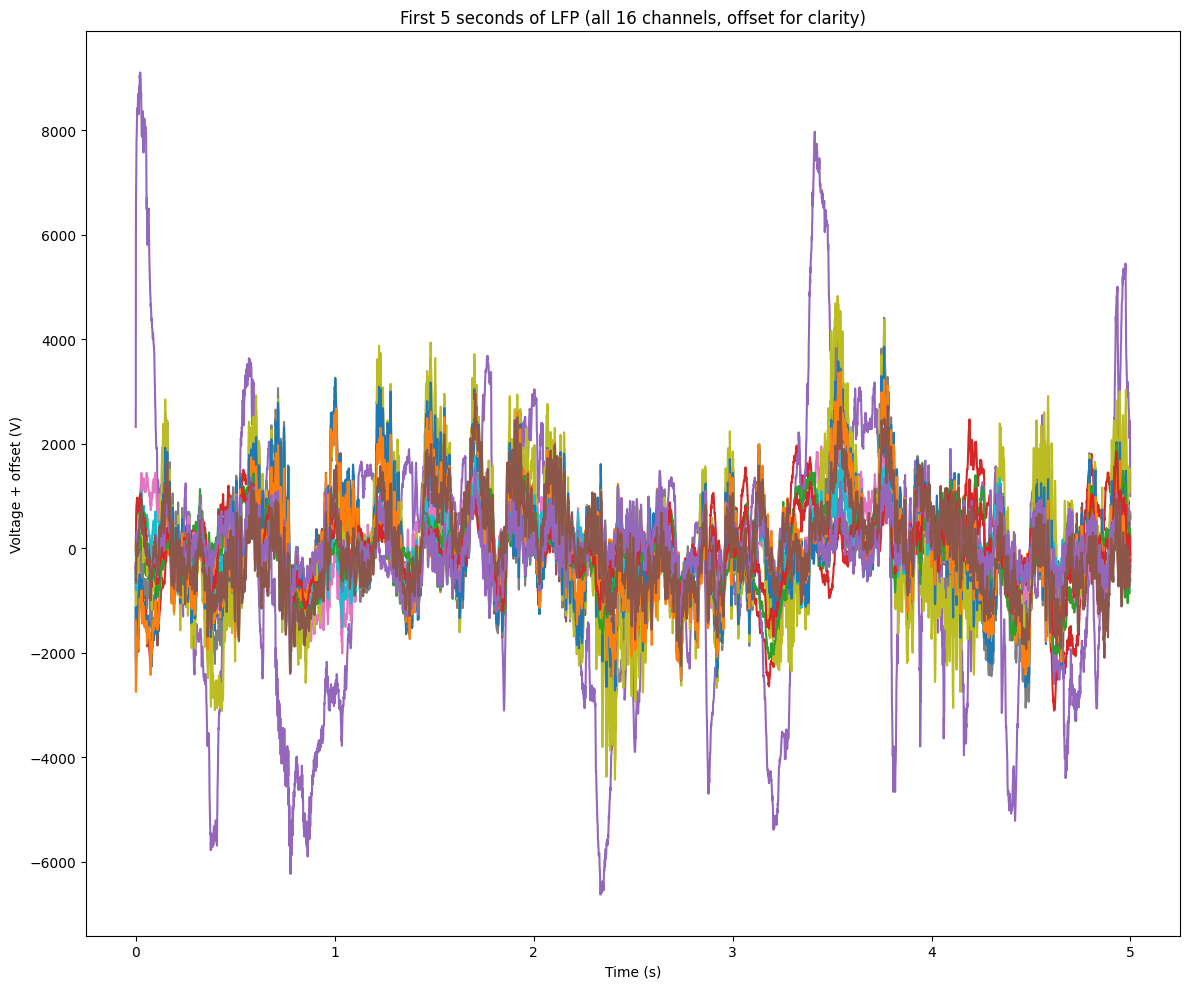

LFP segment shape: (5000, 16)
LFP segment mean (all channels): -2.348498116554122
LFP segment std (all channels): 1084.0253849532737
Channels plotted: 16
Samples per channel (5 seconds): 5000


In [3]:
import numpy as np
import matplotlib.pyplot as plt

LFP = nwb.acquisition["LFP"]
rate = LFP.rate  # Hz
n_channels = LFP.data.shape[1]
n_samples_5sec = int(5 * rate)
lfp_snippet = LFP.data[:n_samples_5sec, :]
time = np.arange(n_samples_5sec) / rate

plt.figure(figsize=(12, 10))
for i in range(n_channels):
    plt.plot(time, lfp_snippet[:, i] + i * 0.2, label=f'Ch {i}')  # offset channels for visibility
plt.xlabel('Time (s)')
plt.ylabel('Voltage + offset (V)')
plt.title('First 5 seconds of LFP (all 16 channels, offset for clarity)')
plt.tight_layout()
plt.show()

print("LFP segment shape:", lfp_snippet.shape)
print("LFP segment mean (all channels):", np.mean(lfp_snippet))
print("LFP segment std (all channels):", np.std(lfp_snippet))
print("Channels plotted:", n_channels)
print("Samples per channel (5 seconds):", n_samples_5sec)

*The plot above shows 16 simultaneous LFP channels over the first 5 seconds. One channel displays a higher amplitude than the others, and all exhibit fluctuating voltage characteristic of LFP.*

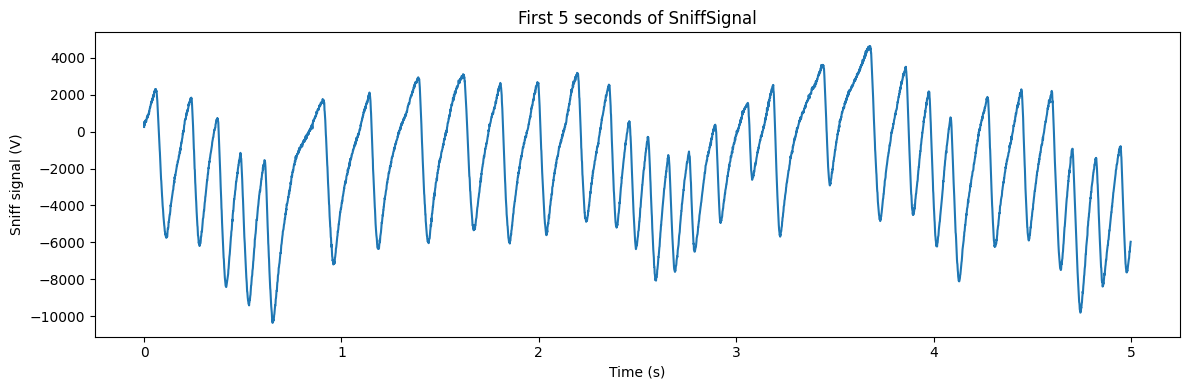

SniffSignal segment shape: (5000,)
SniffSignal segment mean: -1842.6072154851818
SniffSignal segment std: 3066.343323136339
Samples plotted (5 seconds): 5000


In [4]:
SniffSignal = nwb.acquisition["SniffSignal"]
sniff_snippet = SniffSignal.data[:n_samples_5sec]
time = np.arange(n_samples_5sec) / rate

plt.figure(figsize=(12, 4))
plt.plot(time, sniff_snippet)
plt.xlabel('Time (s)')
plt.ylabel('Sniff signal (V)')
plt.title('First 5 seconds of SniffSignal')
plt.tight_layout()
plt.show()

print("SniffSignal segment shape:", sniff_snippet.shape)
print("SniffSignal segment mean:", np.mean(sniff_snippet))
print("SniffSignal segment std:", np.std(sniff_snippet))
print("Samples plotted (5 seconds):", n_samples_5sec)

*This trace shows raw sniffing activity, which exhibits strong, periodic oscillations over time &ndash; corresponding to the animal's breathing cycles.*

### Inspecting Event Annotations

Event annotations (e.g., inhalation/exhalation times) are available under the `behavior` processing module.
For this session, event annotation vectors consist primarily of exhalation events clustered at time zero, with no apparent inhalation events.

behavior = nwb.processing["behavior"]
inh = behavior.data_interfaces["inhalation_time"]
exh = behavior.data_interfaces["exhalation_time"]

inh_times = inh.timestamps[:]
exh_times = exh.timestamps[:]

Find events in first 5 seconds
window_end = 5.0
inh_times_win = inh_times[inh_times <= window_end]
exh_times_win = exh_times[exh_times <= window_end]

print('Total inhalation events in first 5 seconds:', len(inh_times_win))
print('Total exhalation events in first 5 seconds:', len(exh_times_win))
print('First 3 inhalation times:', inh_times_win[:3])
print('First 3 exhalation times:', exh_times_win[:3])

For this file, event times may not be fully annotated except at the start; further files may differ.

## Combined Visualization: LFP and Sniff Signal

To explore potential relationships between neural and behavioral dynamics, we can plot a single LFP channel (e.g., channel 0) alongside the sniff signal for the same 5-second window.

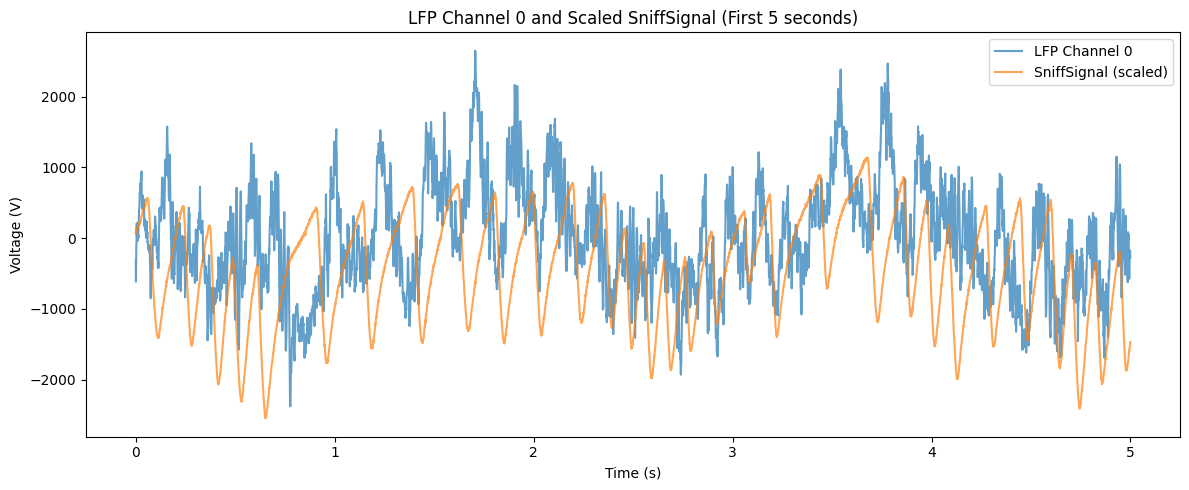

In [5]:
plt.figure(figsize=(12, 5))
plt.plot(time, lfp_snippet[:, 0], label='LFP Channel 0', alpha=0.7)
plt.plot(time, sniff_snippet / np.std(sniff_snippet) * np.std(lfp_snippet[:, 0]), label='SniffSignal (scaled)', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('LFP Channel 0 and Scaled SniffSignal (First 5 seconds)')
plt.legend()
plt.tight_layout()
plt.show()

# *Here, the sniff signal is scaled to match the LFP channel variance for comparative visualization. This plot may suggest coordination or relationship between olfactory bulb activity and animal breathing behavior, but further statistical analysis would be required for interpretation.*

## Power Spectrum of LFP

Spectral analysis can help reveal oscillatory activity or dominant rhythms in the neural data. We compute the power spectrum for LFP channel 0 in the first 5 seconds.

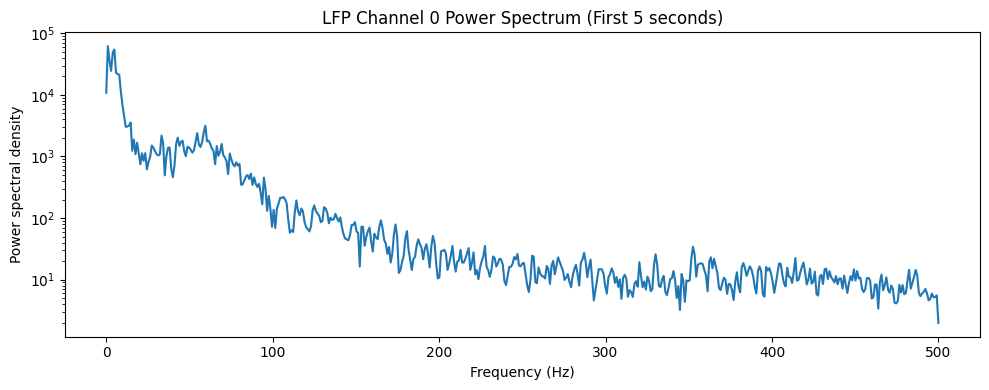

In [6]:
from scipy.signal import welch

f, Pxx = welch(lfp_snippet[:, 0], fs=rate, nperseg=1024)
plt.figure(figsize=(10, 4))
plt.semilogy(f, Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density')
plt.title('LFP Channel 0 Power Spectrum (First 5 seconds)')
plt.tight_layout()
plt.show()

# *Prominent peaks in the spectrum reflect rhythmic activity in the local field potential. In olfactory bulb, specific frequencies may correspond to breathing cycles or network oscillations.*

This notebook demonstrated how to access Dandiset 001433 via the DANDI API, remotely stream an NWB file, show LFP and sniffing behavior, examine annotations, and compute the LFP power spectrum for a sample session.  
Further analyses could include:

- Quantitative comparison of LFP or sniff features across sessions or sites
- Statistical relationship testing between signal types
- Examination of more detailed event annotation in other files

**This notebook was machine-generated; check code and outputs before scientific interpretation!**

## Summary and Future Directions

This notebook demonstrated how to access Dandiset 001433 via the DANDI API, remotely stream an NWB file, and visualize LFP and sniffing behavior for a sample session. Further analysis could include:

- Quantitative comparison of LFP features across sessions or brain regions
- Analysis of breathing event times, if annotated more comprehensively in other files
- Investigation of relationships between behavioral sniff events and electrophysiological signals
- Use of Neurosift or other tools to further explore the data interactively

**Remember:**  
This notebook was machine-generated; always check code carefully and adapt workflow as appropriate for your scientific question and data interpretation!